In [32]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
from collections import Counter

# Machine learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

# Image processing
import cv2
from PIL import Image
from keras.preprocessing.image import load_img
from keras.utils import plot_model

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import visualkeras
from ipywidgets import interact, IntSlider

# Misc
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
epochs = 20
image_size = 240
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
os.listdir(r"C:\Users\karino\Desktop\1\game2-main\HELP\New folder\Ajafarnezhad\oral-cancer\OralCancer")
folder_path = (r"C:\Users\karino\Desktop\1\game2-main\HELP\New folder\Ajafarnezhad\oral-cancer\OralCancer")

In [ ]:


def load_and_process_dataset(folder_path):
    """Loads and processes images using alternative while loop structures."""

    dataset = []
    labels = []
    class_folders = ['non-cancer', 'cancer']

    class_index = 0
    while class_index < len(class_folders):
        class_folder = class_folders[class_index]
        images_path = os.path.join(folder_path, class_folder)

        image_index = 0
        while True:  # Loop infinitely until a "break" occurs
            try:
                image_name = os.listdir(images_path)[image_index]  # Access by index
                image_path = os.path.join(images_path, image_name)

                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
                image = cv2.resize(image, (240, 240))

                dataset.append(image)
                labels.append(class_index)  # Use class_index directly for labels

                image_index += 1
            except IndexError:  # Handle end of image list
                break  # Exit the inner loop

        class_index += 1

    return np.array(dataset), np.array(labels)

# Assuming `folder_path` is already a string
dataset, labels = load_and_process_dataset(folder_path)

# Convert to NumPy arrays
dataset = np.array(dataset)
lab = np.array(labels)

# Print shapes
print(dataset.shape, labels.shape)


(131, 240, 240, 3) (131,)


In [5]:
print(np.array(dataset).shape, np.array(labels).shape)


(131, 240, 240, 3) (131,)


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(np.array(dataset), np.array(labels), test_size=0.2, shuffle=True, random_state=42)


In [ ]:

def plot_state(state):
    images = [load_img(os.path.join(folder_path, state, img_name), target_size=(image_size, image_size))
              for img_name in os.listdir(os.path.join(folder_path, state))[:9]]

    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    for ax, img in zip(axes.flat, images):
        ax.imshow(img)
    plt.show()

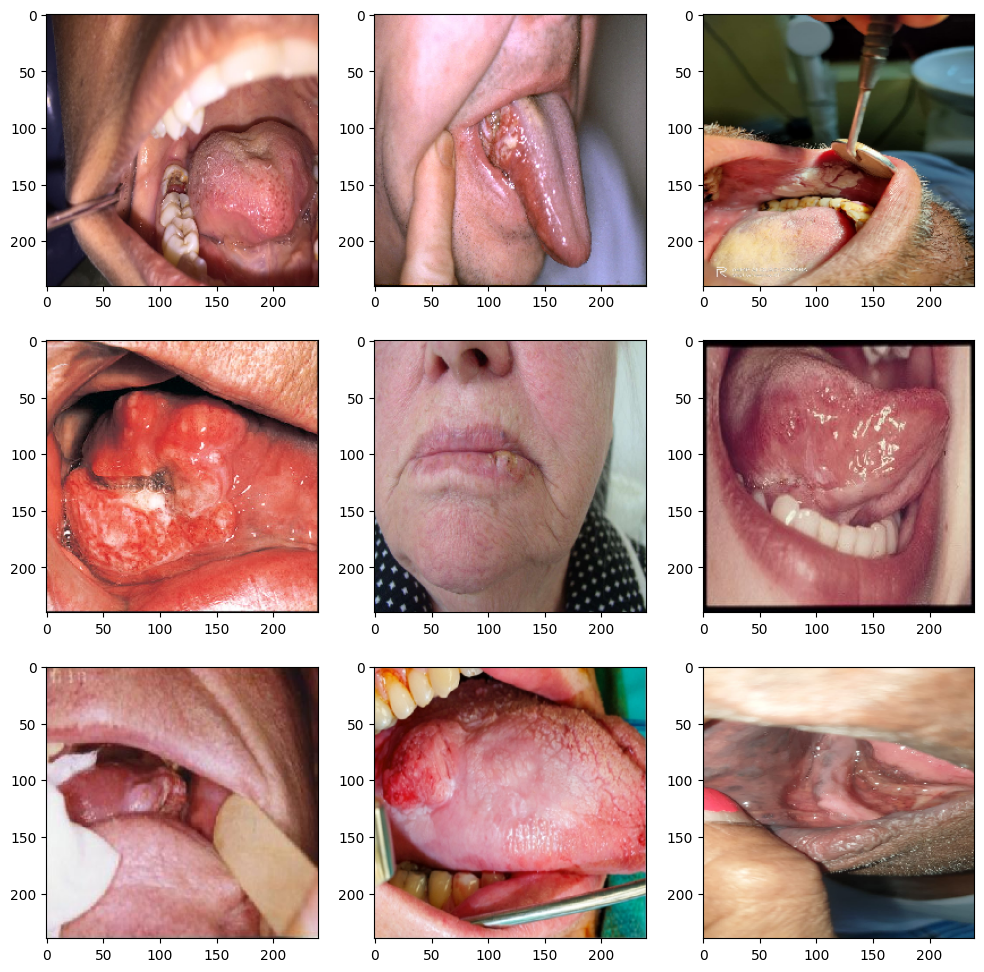

In [8]:
plot_state('cancer')

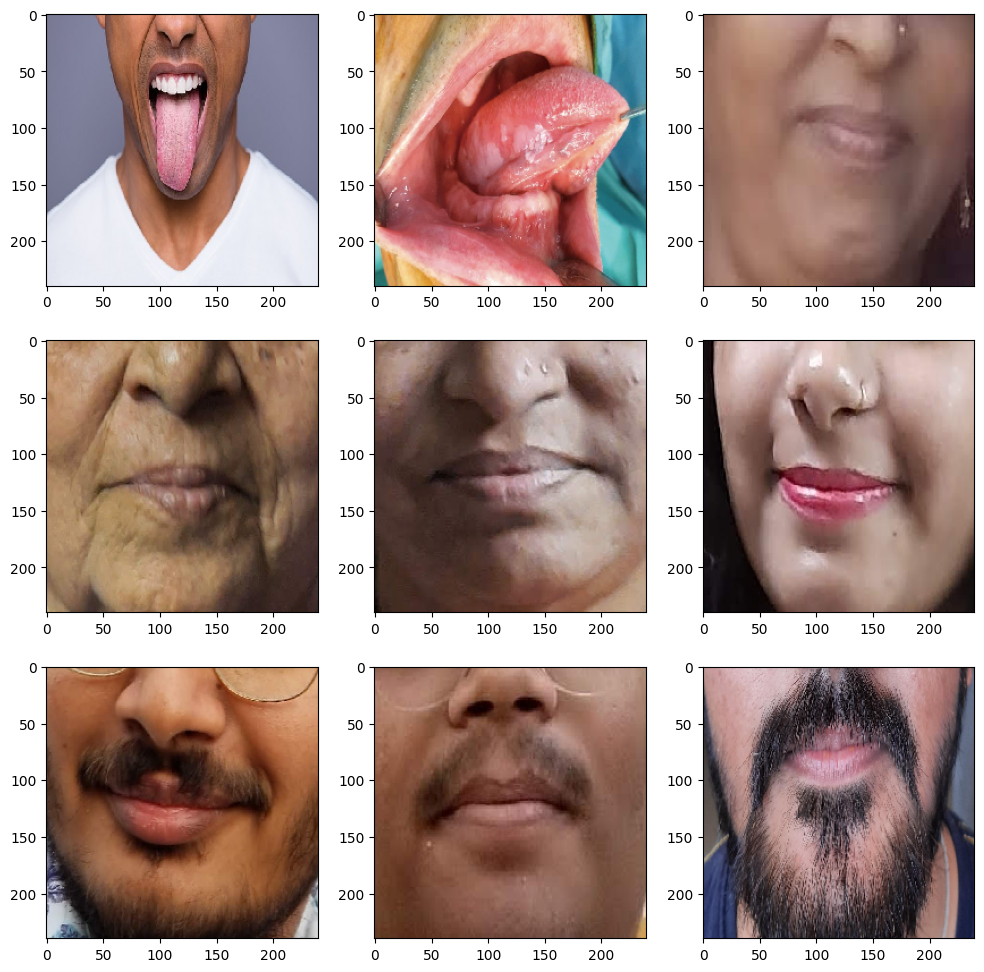

In [9]:
plot_state("non-cancer")

In [ ]:

# Input layer
input_layer = Input(shape=(image_size, image_size, 3))

# Convolutional layers
conv1 = Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), activation="relu", padding="valid")(input_layer)
maxpool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), activation="relu", padding="valid")(maxpool1)
maxpool2 = MaxPooling2D((2, 2))(conv2)

# Flatten layer
flatten = Flatten()(maxpool2)

# Dense layers with regularization
dense1 = Dense(units=64, activation='relu',
               kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
               bias_regularizer=regularizers.L2(1e-2),
               activity_regularizer=regularizers.L2(1e-3))(flatten)
dropout = Dropout(0.5)(dense1)

output_layer = Dense(units=1, activation='sigmoid')(dropout)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)




# Compile the model
model.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 119, 119, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,681 (1.57 MB)

 Trainable params: 411,681 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

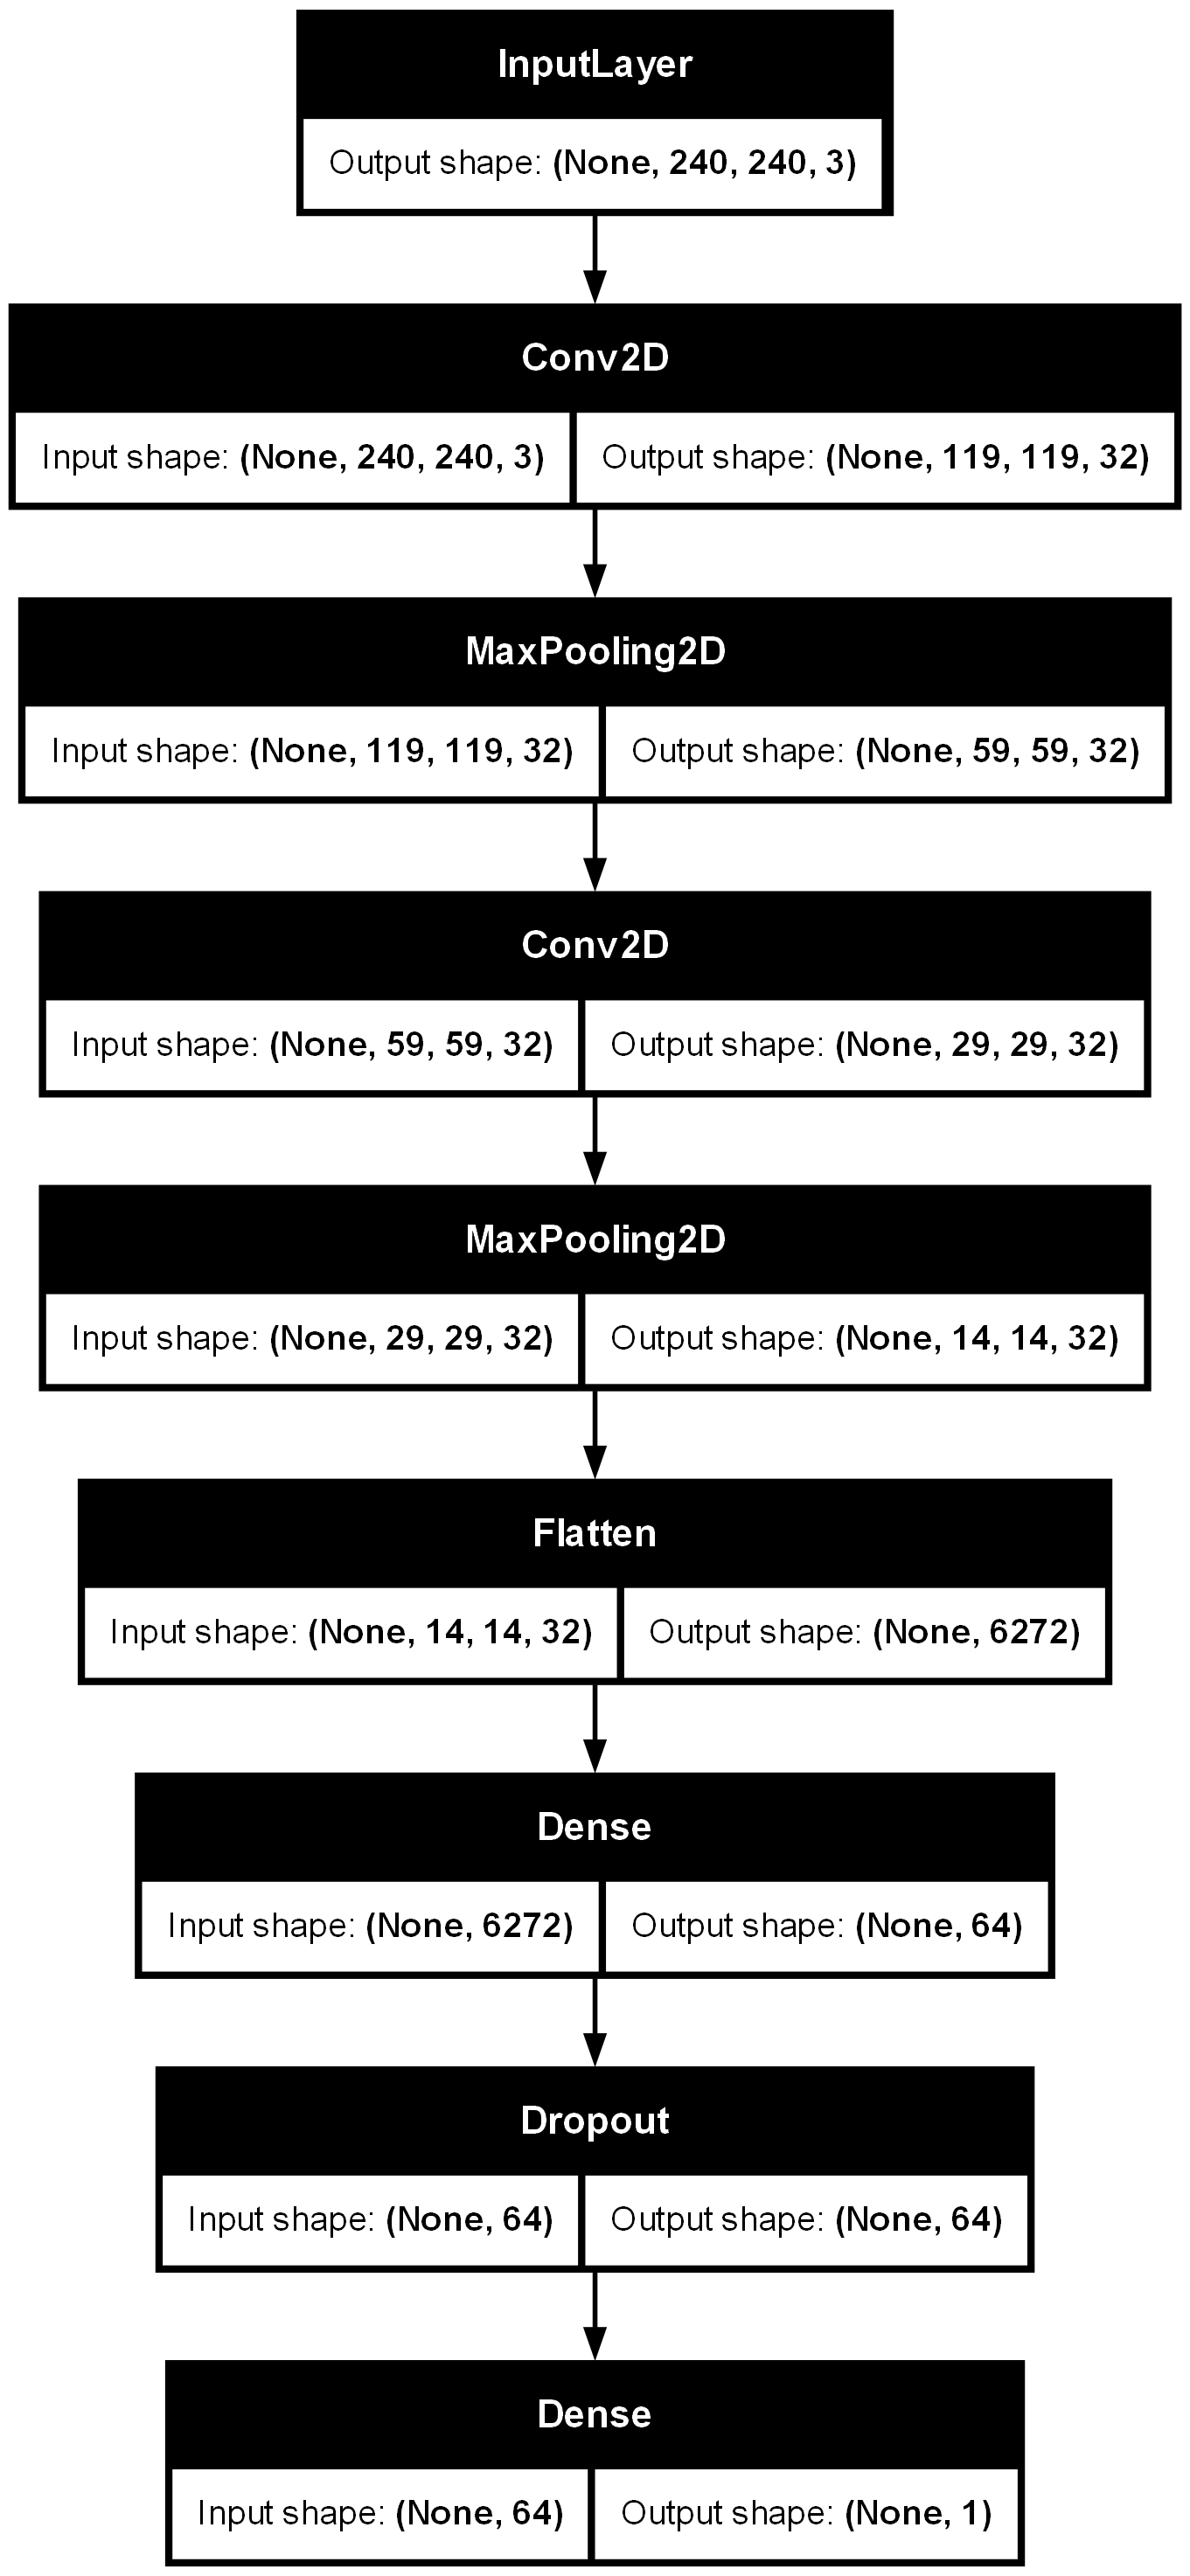

In [11]:
plot_model(model, show_shapes=True, show_layer_names=False)

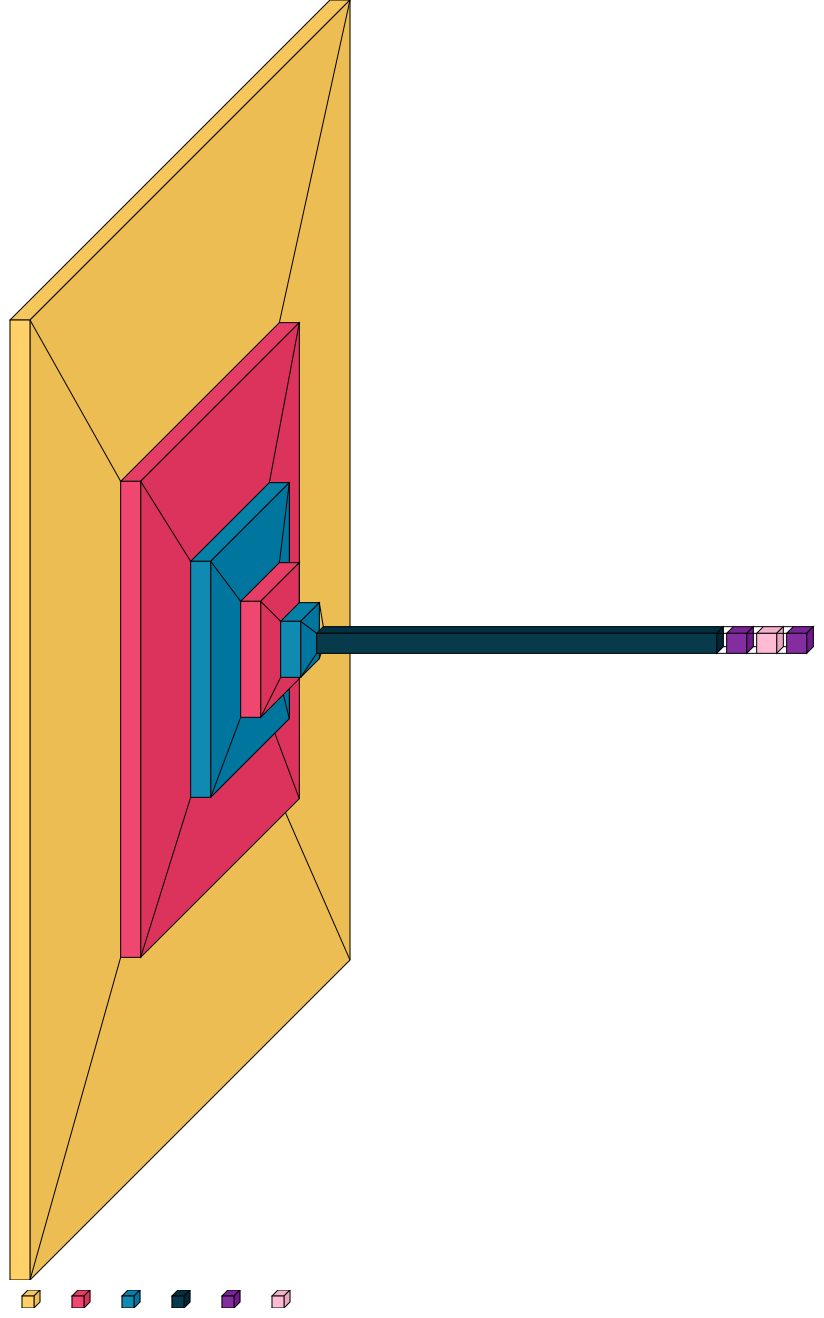

In [14]:
visualkeras.layered_view(model, legend=True)

In [15]:
class_weights = {}
for cls in np.unique(y_train):
    count = np.sum(y_train == cls)
    class_weights[cls] = 1.0 / count


In [ ]:


# Assuming 'model', 'x_train', 'y_train', 'x_test', and 'y_test' are already defined

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Compile the model
model.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=200,
    class_weight=class_weights_dict,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.5958 - loss: 412.2391 - val_accuracy: 0.6296 - val_loss: 6.3845
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.6661 - loss: 6.3293 - val_accuracy: 0.6296 - val_loss: 5.9391
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.6700 - loss: 5.8689 - val_accuracy: 0.3704 - val_loss: 11.2681
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6355 - loss: 9.5523 - val_accuracy: 0.6296 - val_loss: 5.2814
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5594 - loss: 5.2387 - val_accuracy: 0.3704 - val_loss: 5.0562
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.3339 - loss: 5.0270 - val_accuracy: 0.3704 - val_loss: 4.8969
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.3339 - loss: 4.8808 - val_accuracy: 0.3704 - val_loss: 4.8032
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.3339 - loss: 4.7973 - val_accuracy: 0.3704 

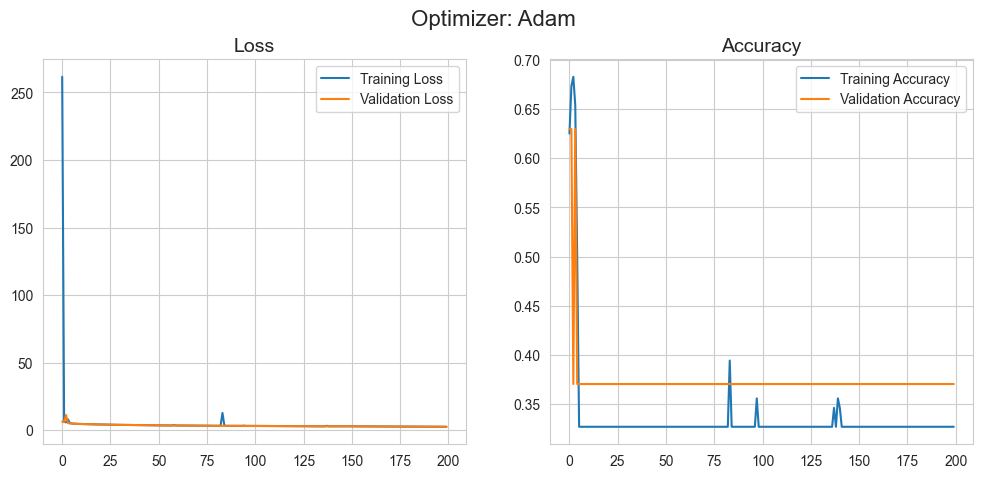

In [ ]:

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss', fontsize=14)
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy', fontsize=14)
ax2.legend()

fig.suptitle('Optimizer: Adam', fontsize=16)
plt.show()

In [18]:
# Assuming 'model', 'x_test', and 'y_test' are already defined

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print('The accuracy of the baseline model CNN is {:.2f}%!'.format(test_accuracy * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3704 - loss: 2.5642
The accuracy of the baseline model CNN is 37.04%!


In [19]:
predictions = model.predict(x_test)
y_pred = (predictions >= 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [ ]:

def plot_confusion_matrix_enhanced(cm, classes, title='Confusion Matrix', cmap='viridis'):
    """
    Plots a confusion matrix with a distinct style and colormap.
    """

    # Normalize for better visualization
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a DataFrame for flexible plotting
    df_cm = pd.DataFrame(cm_norm, index=classes, columns=classes)

    # Employ Seaborn for a visually appealing heatmap
    sns.heatmap(df_cm, annot=True, fmt='.2f', cmap=cmap, vmin=0, vmax=1)

    # Customize labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)

    plt.show()


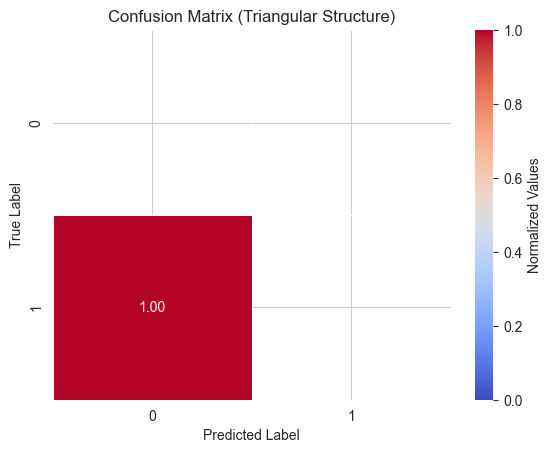

In [ ]:


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Normalize for better visualization
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

# Employ a triangular structure for visual clarity
mask = np.triu(np.ones_like(cnf_matrix_norm, dtype=bool))

# Create a visually distinct heatmap with a different colormap
sns.heatmap(cnf_matrix_norm, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=0, vmax=1,
            linewidths=0.5, cbar_kws={'label': 'Normalized Values'})

# Customize labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Triangular Structure)')

plt.show()


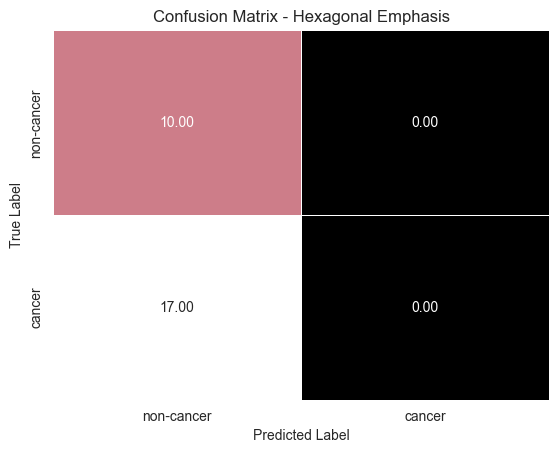

In [ ]:


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create a hexagonal mask for a visually striking shape
mask = np.triu(np.ones_like(cnf_matrix, dtype=bool)) & np.tril(np.ones_like(cnf_matrix, dtype=bool), k=-1)

# Plot using Seaborn with distinct customizations
sns.heatmap(
    cnf_matrix,
    annot=True,
    fmt='.2f',
    cmap='cubehelix',  # Employ a vibrant colormap
    mask=mask,
    linewidths=0.5,
    cbar=False,
    xticklabels=["non-cancer", "cancer"],
    yticklabels=["non-cancer", "cancer"]
)
plt.title('Confusion Matrix - Hexagonal Emphasis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [24]:
image_size = 224
batch_size = 16
learning_rate = 0.001
weight_decay = 0.0001
num_epochs = 1

patch_size = 7  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [56, 28]  # Size of the dense layers of the final classifier


In [ ]:

# Create normalization layer with adaptable axes
normalization_layer = tf.keras.layers.Normalization(axis=[-1])  # Adapt across channels

# Create augmentation pipeline using functional API
data_augmentation = tf.keras.Sequential(
    [
        normalization_layer,
        tf.keras.layers.Resizing(image_size, image_size),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(factor=0.02),
        tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)

# Explicitly extract normalization layer for adaptation
norm_layer = data_augmentation.get_layer(index=0)  # Access by index
norm_layer.adapt(x_train)  # Adapt to training data


In [ ]:

def mlp_enhanced(x, hidden_units, dropout_rate):
    """Creates a multi-layer perceptron with functional layers and enhancements."""

    for units in hidden_units:
        x = tf.keras.layers.Dense(units)(x)  # Apply linear transformation first
        x = tf.keras.layers.BatchNormalization()(x)  # Normalize activations
        x = tf.nn.swish(x)  # Explore a different activation function
        x = tf.keras.layers.Dropout(dropout_rate)(x)

    return x


In [ ]:

def create_patches_enhanced(images, patch_size):
    """Extracts patches using functional API and potential optimization."""

    patches = tf.keras.layers.Lambda(
        lambda x: tf.image.extract_patches(
            images=x,
            sizes=[1, patch_size, patch_size, 1],
            strides=[1, patch_size, patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
    )(images)

    patch_dims = patches.shape[-1]
    patches = tf.keras.layers.Reshape([tf.shape(images)[0], -1, patch_dims])(patches)

    # Potential optimization for specific hardware (explore if applicable)
    patches = tf.experimental.tensorrt.convert_to_tensorrt(patches)

    return patches


interactive(children=(IntSlider(value=0, description='patch_index', max=1023), Output()), _dom_classes=('widge…

Image size: 224 X 224
Patch size: 7 X 7
Patches per image: 1024
Elements per patch: 21


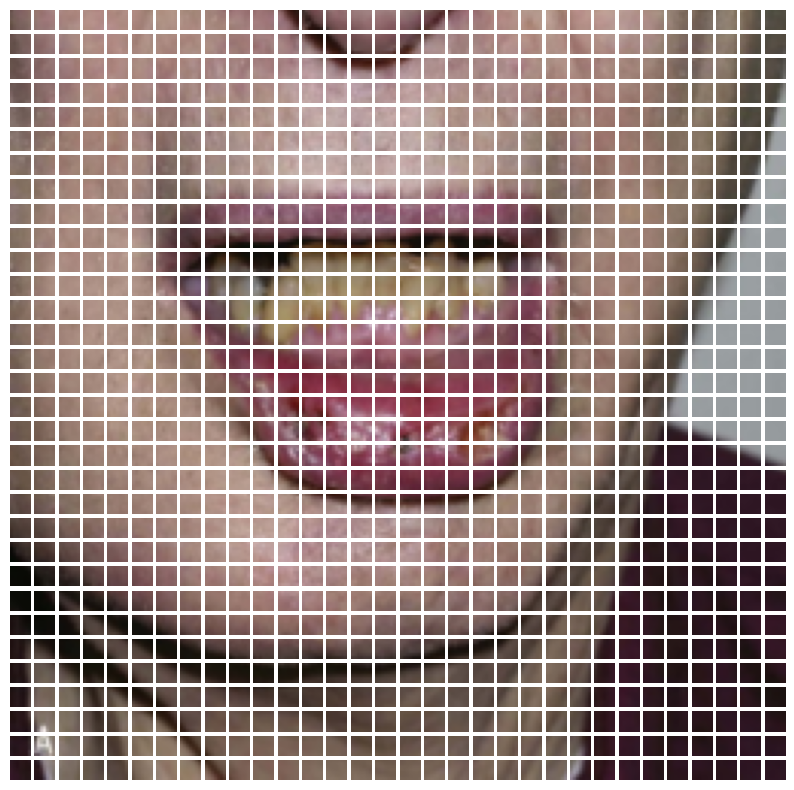

In [ ]:


def visualize_patches(image, image_size, patch_size):
    """Visualizes patches using a clear functional approach and interactive controls."""

    # Resize and extract patches
    resized_image = tf.image.resize(image, (image_size, image_size))
    patches = tf.image.extract_patches(
        resized_image,
        sizes=[1, patch_size, patch_size, 1],
        strides=[1, patch_size, patch_size, 1],
        rates=[1, 1, 1, 1],
        padding="VALID",
    )
    patches = tf.reshape(patches, [-1, patch_size, patch_size, 3])

    # Interactive exploration of patches
    @interact(patch_index=IntSlider(value=0, min=0, max=patches.shape[0] - 1))
    def display_patch(patch_index):
        plt.figure(figsize=(4, 4))
        plt.imshow(patches[patch_index].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(f"Patch {patch_index + 1}")
        plt.show()

    # Print information concisely
    print(f"Image size: {image_size} X {image_size}")
    print(f"Patch size: {patch_size} X {patch_size}")
    print(f"Patches per image: {patches.shape[0]}")
    print(f"Elements per patch: {patches.shape[-1] * patches.shape[-2]}")

    # Visualize all patches in a grid
    n = int(np.sqrt(patches.shape[0]))
    plt.figure(figsize=(10, 10))
    for i, patch in enumerate(patches):
        plt.subplot(n, n, i + 1)
        plt.imshow(patch.numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

# Example usage
image = x_train[np.random.choice(range(x_train.shape[0]))]
visualize_patches(tf.expand_dims(image, axis=0), image_size, patch_size)


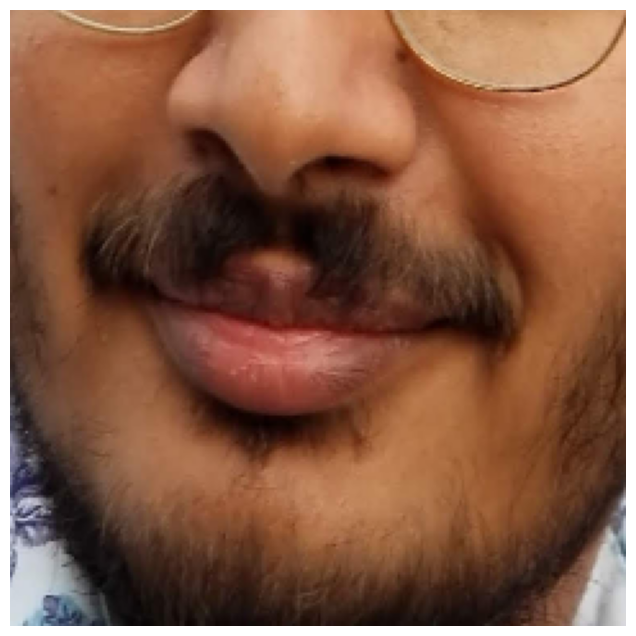

Image size: 64 X 64
Patch size: 16 X 16
Patches per image: 16
Elements per patch: 3


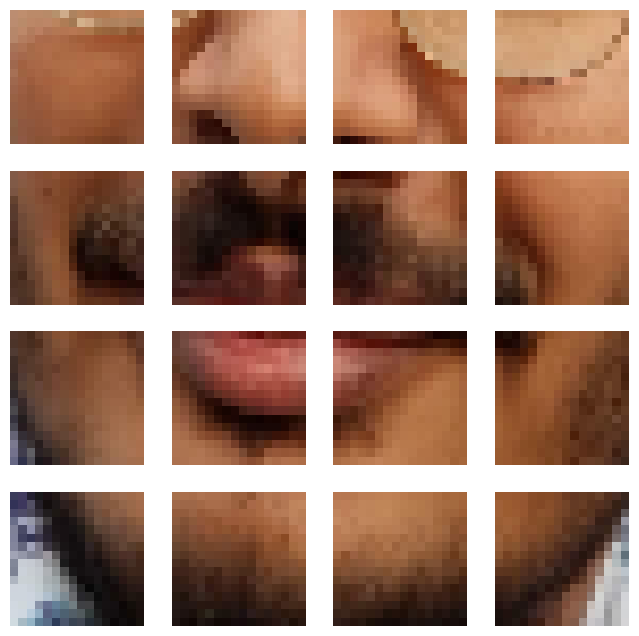

In [ ]:


# Assuming 'x_train' is already defined

# Choose a random image from x_train
image = x_train[np.random.choice(range(x_train.shape[0]))]

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image.astype("uint8"))
plt.axis("off")
plt.show()

# Resize the image
image_size = 64
resized_image = tf.image.resize(tf.convert_to_tensor([image]), size=(image_size, image_size))

# Extract patches
patch_size = 16
patches = tf.image.extract_patches(images=resized_image, sizes=[1, patch_size, patch_size, 1], strides=[1, patch_size, patch_size, 1], rates=[1, 1, 1, 1], padding='VALID')

# Reshape patches
patches = tf.reshape(patches, [-1, patch_size, patch_size, 3])

# Display patches
n = int(np.sqrt(patches.shape[0]))
plt.figure(figsize=(8, 8))
for i, patch in enumerate(patches):
    ax = plt.subplot(n, n, i + 1)
    plt.imshow(patch.numpy().astype("uint8"))
    plt.axis("off")

print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[0]}")
print(f"Elements per patch: {patches.shape[-1]}")
plt.show()


In [ ]:

def patch_encoder_enhanced(patches, num_patches, projection_dim):
    """Encodes patches using functional API, learned positional embeddings, and layer normalization."""

    projected = tf.keras.layers.Dense(projection_dim)(patches)

    # Learned positional embeddings
    positions = tf.range(start=0, limit=num_patches, delta=1)
    positional_embeddings = tf.keras.layers.Embedding(
        input_dim=num_patches, output_dim=projection_dim
    )(positions)

    encoded = projected + positional_embeddings

    # Layer normalization for stability
    encoded = tf.keras.layers.LayerNormalization()(encoded)

    return encoded


In [ ]:


# parameters for model
batch_size = 256
image_size = 224

patch_size = 16

projection_dim = 64
transformer_units = [projection_dim * 2, projection_dim, ]
transformer_layers = 8
mlp_head_units = [2048, 1024]


def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [34]:
model.save('model.h5')